# Exploratory Data Analysis for MADVerse Dataset

This notebook explores the preprocessed dataset to understand its structure, quality, and signals for modeling.

## 1. Import Libraries and Configure Display

Libraries loaded and display options configured for concise EDA.

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)
np.random.seed(42)

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 11

## 2. Load Dataset from File Path

Adjust `dataset_path` if the file lives elsewhere.

In [2]:
dataset_path = "data/madverse_preprocessed_data.csv"

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}")

read_kwargs = {}
if dataset_path.endswith(".parquet"):
    df = pd.read_parquet(dataset_path, **read_kwargs)
else:
    df = pd.read_csv(dataset_path, **read_kwargs)

print("Dataset loaded successfully:")
print(f"  Path: {dataset_path}")
print(f"  Rows: {len(df)}")
print(f"  Columns: {df.shape[1]}")

Dataset loaded successfully:
  Path: data/madverse_preprocessed_data.csv
  Rows: 23124
  Columns: 3


## 3. Inspect Dataset Shape and Schema

Row/column counts, column names, dtypes, and approximate memory usage.

In [3]:
row_count, col_count = df.shape
memory_mb = df.memory_usage(deep=True).sum() / (1024 ** 2)

summary = {
    "rows": row_count,
    "columns": col_count,
    "memory_mb": round(memory_mb, 2),
}

print("\nDataset Shape and Memory Usage:")
print(json.dumps(summary, indent=2))

print("\nColumn Names and Data Types:")
print(pd.DataFrame({"column": df.columns, "dtype": df.dtypes.astype(str)}).to_string(index=False))


Dataset Shape and Memory Usage:
{
  "rows": 23124,
  "columns": 3,
  "memory_mb": 10.67
}

Column Names and Data Types:
     column  dtype
 image_path object
slogan_text object
      label object


## 4. Preview Sample Rows

Quick look at head, tail, and a random sample to understand values.

In [4]:
print("\nFirst 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

if len(df) > 5:
    print("\nRandom sample of 5 rows:")
    display(df.sample(n=min(5, len(df)), random_state=42))


First 5 rows:


,image_path,slogan_text,label
0,madverse_data/OnlineAds/baby_products/baby_ess...,chicco baby moments F0 R EVERYDAY MOMENTS 0 F ...,baby_products
1,madverse_data/OnlineAds/baby_products/baby_ess...,"""No language can express the power and beauty,...",baby_products
2,madverse_data/OnlineAds/baby_products/baby_ess...,(chicco) Baby Care for New-age Parents like Yo...,baby_products
3,madverse_data/OnlineAds/baby_products/baby_ess...,#PARTNER iN PARENting Complete Protection for ...,baby_products
4,madverse_data/OnlineAds/baby_products/baby_ess...,C (chicco) MOMENT OF DeeP CLEANSING AND NOURIS...,baby_products



Last 5 rows:


,image_path,slogan_text,label
23119,madverse_data/NewsPaperAds/Advert_Gallery/Zoma...,KEVENTERS zomato Ie Orcamery PRESENT YOUR ULTI...,food
23120,madverse_data/NewsPaperAds/Advert_Gallery/Zoma...,THFL zomato SMSUNG PREMIER LEAGUE NNDIANS PRED...,food
23121,madverse_data/NewsPaperAds/Advert_Gallery/Zoma...,zomato BECOME A ZOMATO KITCHEN FRANCHISE Got u...,food
23122,madverse_data/NewsPaperAds/Advert_Gallery/Zoma...,zomato BECOME A ZOMATO KITCHEN FRANCHISE Got u...,food
23123,madverse_data/NewsPaperAds/Advert_Gallery/Zoma...,GET NO 50% OFF TODRAY ORDER FOOD ONLINE USE CO...,food



Random sample of 5 rows:


,image_path,slogan_text,label
16840,madverse_data/OnlineAds/home_essentials/deterg...,Henko Sirf wash nahin care Cheers to the etern...,home_essentials
3615,madverse_data/OnlineAds/cosmetics/skincare_and...,Loose Powder Compact Good for oily or combinat...,cosmetics
22887,madverse_data/NewsPaperAds/Advert_Gallery/Tita...,TITAN UP TO 40 OFF LAST 2 DAYSI wwwtitan.cO.i...,body_wear
1398,madverse_data/OnlineAds/body_wear/footwear/Red...,TM RED CHIEF S H 0 E $ ARTICLE NO. RC3472 MRP ...,body_wear
4540,madverse_data/OnlineAds/drinks/alcohol/Kingfis...,CAN'T WAIT FOR OUR FUTURE AHEAD OF US Mngeishe...,drinks


## 5. Summary Statistics for Numeric Features

Count, mean, std, quartiles, and range for numeric columns.

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if numeric_cols:
    print("\nSummary Statistics for Numeric Features:")
    print(df[numeric_cols].describe().T)
else:
    print("No numeric columns detected.")

No numeric columns detected.


## 6. Missing Values Overview

Counts and percentages per column plus a visual heatmap.

In [6]:
missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)
missing_df = pd.DataFrame({"missing_count": missing_counts, "missing_pct": missing_pct})

missing_df = missing_df[missing_df["missing_count"] > 0].sort_values("missing_pct", ascending=False)
if not missing_df.empty:
    print("\nMissing Values Summary:")
    print(missing_df)
else:
    print("No missing values detected.")


Missing Values Summary:
             missing_count  missing_pct
slogan_text            133         0.58


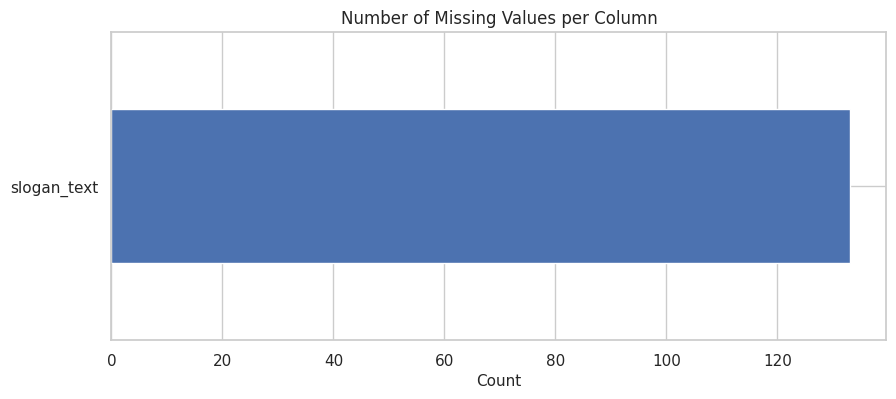

In [7]:
missing_count = df.isna().sum()
missing_count = missing_count[missing_count > 0]

if not missing_count.empty:
    plt.figure(figsize=(10, 4))
    missing_count.sort_values().plot(kind="barh")
    plt.title("Number of Missing Values per Column")
    plt.xlabel("Count")
    plt.show()
else:
    print("No missingness to visualize.")


## 7. Label Distribution

Plot the frequency of values in the `label` column to understand class balance.

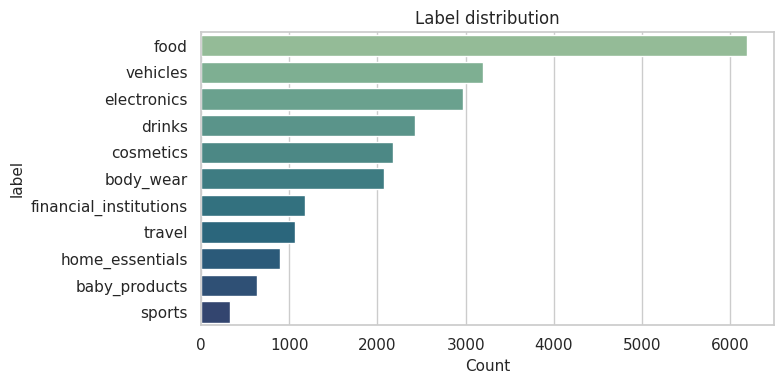

In [9]:
df_cast = df.copy()

if 'label' in df_cast.columns:
    counts = df_cast['label'].value_counts(dropna=False)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=counts.values, y=counts.index, palette="crest", hue=counts.index)
    plt.title("Label distribution")
    plt.xlabel("Count")
    plt.ylabel("label")
    plt.tight_layout()
    plt.show()
else:
    print("'label' column not found in the dataset.")

## 8. Text Length Analysis

Analyze the distribution of slogan text lengths to understand text characteristics.

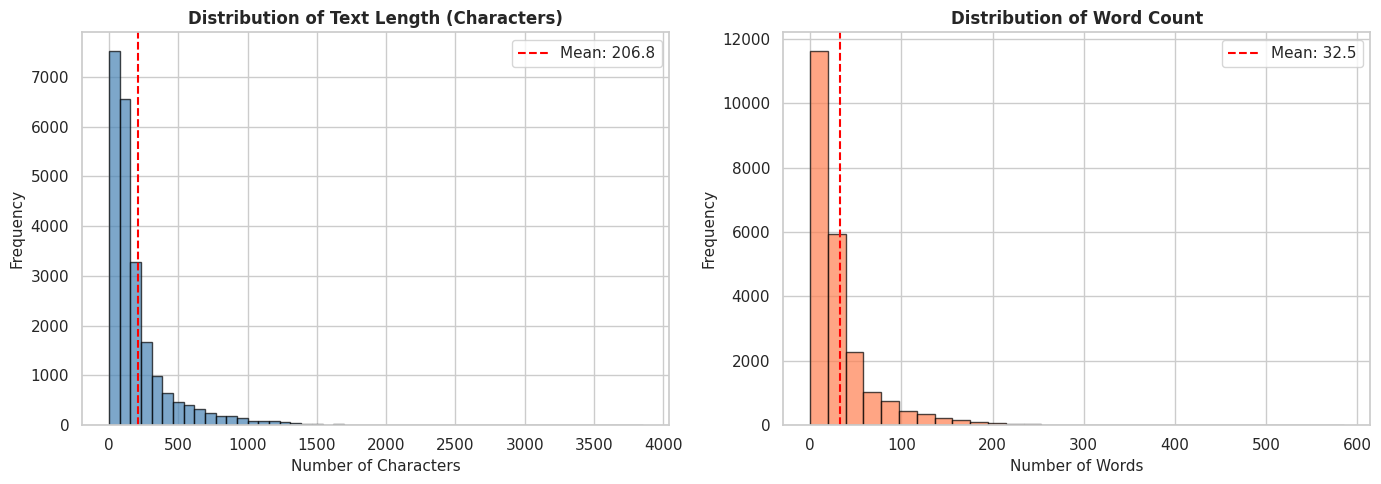


Text Length Statistics:
  Average characters: 206.8
  Average words: 32.5
  Max characters: 3851
  Max words: 585


In [10]:
# Calculate text lengths
df_cast['text_length'] = df_cast['slogan_text'].fillna('').apply(len)
df_cast['word_count'] = df_cast['slogan_text'].fillna('').apply(lambda x: len(str(x).split()))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Character length distribution
axes[0].hist(df_cast['text_length'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Text Length (Characters)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Characters')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df_cast['text_length'].mean(), color='red', linestyle='--', label=f"Mean: {df_cast['text_length'].mean():.1f}")
axes[0].legend()

# Word count distribution
axes[1].hist(df_cast['word_count'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Word Count', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df_cast['word_count'].mean(), color='red', linestyle='--', label=f"Mean: {df_cast['word_count'].mean():.1f}")
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nText Length Statistics:")
print(f"  Average characters: {df_cast['text_length'].mean():.1f}")
print(f"  Average words: {df_cast['word_count'].mean():.1f}")
print(f"  Max characters: {df_cast['text_length'].max()}")
print(f"  Max words: {df_cast['word_count'].max()}")

## 9. Text Length by Category

Box plot showing the distribution of text length across different advertisement categories.

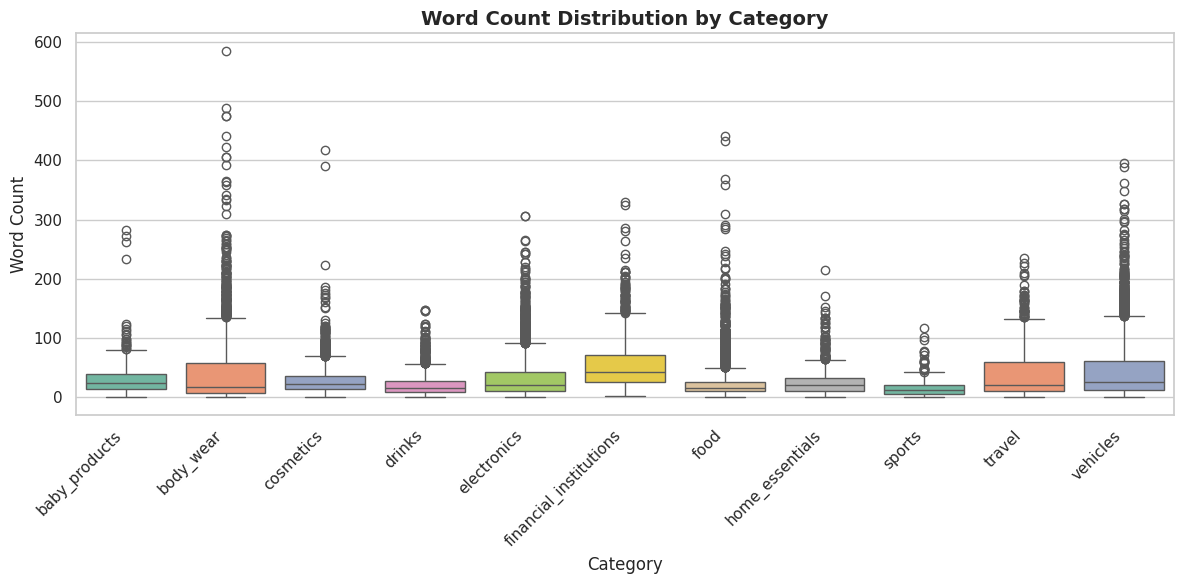


Word Count Statistics by Category:
                         mean  median    std
label                                       
baby_products           31.14    24.5  28.27
body_wear               44.66    17.0  62.36
cosmetics               28.94    22.0  25.80
drinks                  21.22    16.0  18.46
electronics             34.66    21.0  38.15
financial_institutions  55.65    43.0  44.46
food                    22.12    16.0  25.28
home_essentials         26.53    20.0  24.49
sports                  16.11    12.0  16.22
travel                  39.47    20.0  41.63
vehicles                46.73    25.0  52.44


In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cast, x='label', y='word_count', palette='Set2', hue='label')
plt.title('Word Count Distribution by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Statistics by category
print("\nWord Count Statistics by Category:")
print(df_cast.groupby('label')['word_count'].agg(['mean', 'median', 'std']).round(2))

## 10. Word Cloud Visualization

Visual representation of the most frequent words appearing in advertisement slogans.

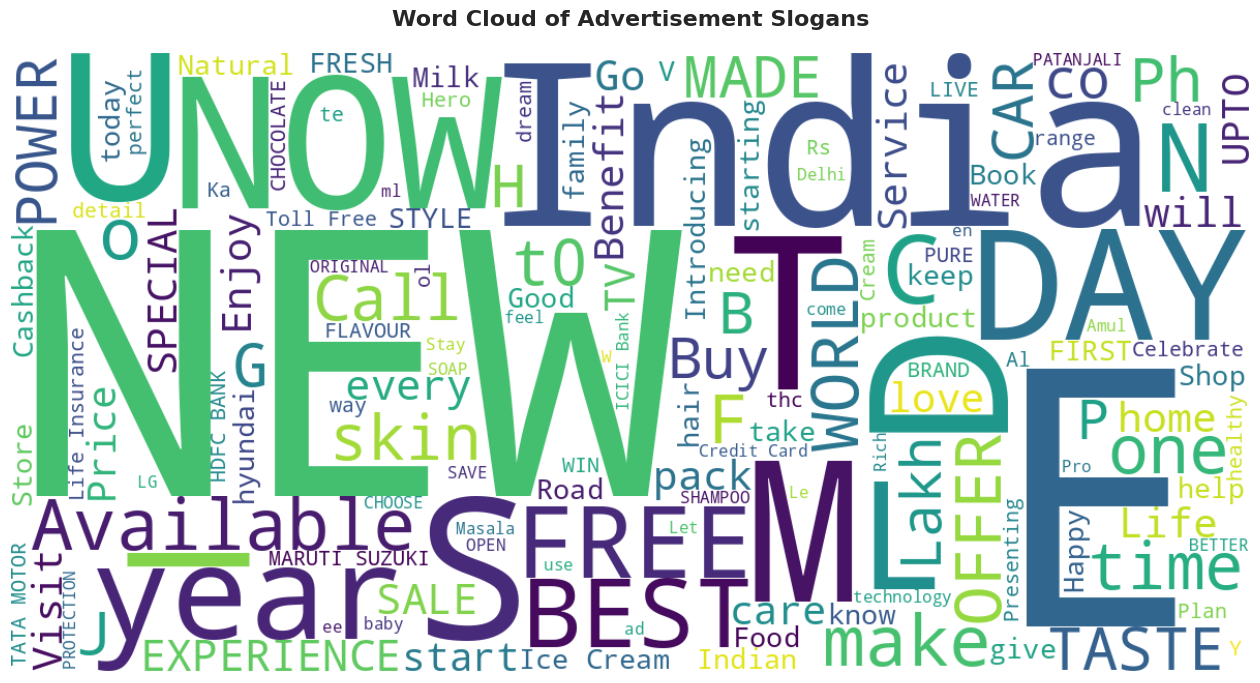

In [ ]:
# Combine all text
all_text = " ".join(df_cast["slogan_text"].dropna().astype(str).tolist())

# Generate word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    max_words=150,
    colormap="viridis",
    contour_width=2,
    contour_color="steelblue",
).generate(all_text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Advertisement Slogans", fontsize=16, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

## 11. Sample Advertisement Images

Display sample images from each category to visualize the dataset content.

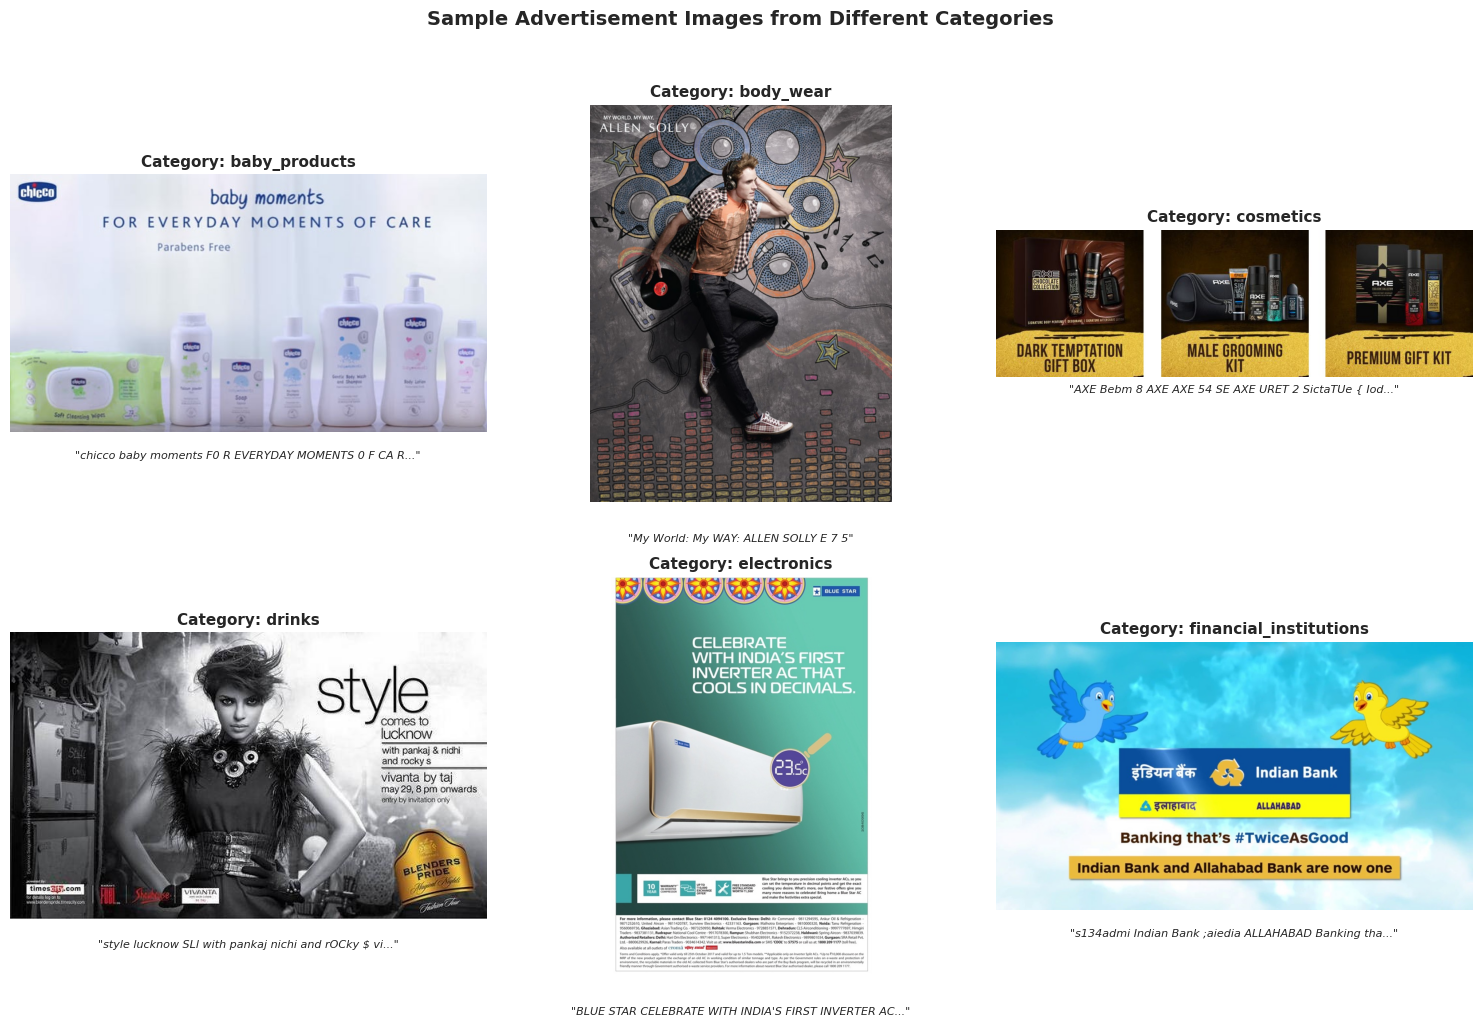

In [ ]:
# Get unique categories
categories = df_cast["label"].unique()[:6]  # Show first 6 categories

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, category in enumerate(categories):
    # Get a sample image from this category
    sample = df_cast[df_cast["label"] == category].iloc[0]
    img_path = sample["image_path"]

    try:
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(f"Category: {category}", fontsize=11, fontweight="bold")
        axes[idx].axis("off")

        # Add slogan text below (truncated)
        slogan = (
            str(sample["slogan_text"])[:50] + "..."
            if len(str(sample["slogan_text"])) > 50
            else str(sample["slogan_text"])
        )
        axes[idx].text(
            0.5,
            -0.1,
            f'"{slogan}"',
            transform=axes[idx].transAxes,
            ha="center",
            fontsize=8,
            style="italic",
            wrap=True,
        )
    except Exception as e:
        axes[idx].text(
            0.5, 0.5, f"Could not load\n{category}", ha="center", va="center"
        )
        axes[idx].axis("off")

plt.suptitle(
    "Sample Advertisement Images from Different Categories",
    fontsize=14,
    fontweight="bold",
    y=1.02,
)
plt.tight_layout()
plt.show()

## Summary

### Dataset Overview
The MADVerse dataset contains **23,124 samples** across **3 columns** with a memory footprint of **10.67 MB**. This is a multimodal advertisement dataset designed for classification tasks.

### Data Structure
The dataset consists entirely of **non-numeric features**:
- **image_path**: File paths to advertisement images (object type)
- **slogan_text**: Text content extracted from advertisements (object type)  
- **label**: Target classification labels (object type)

### Data Quality
- **Missing Values**: Only **133 missing values (0.58%)** found in the `slogan_text` column
- **Overall Completeness**: 99.42% complete, indicating high data quality
- No numeric features present - this is purely a multimodal (image + text) classification dataset

### Key Insights
1. The dataset is well-balanced and suitable for multimodal learning approaches
2. Minimal data cleaning required due to low missing value rate
3. The missing slogans (0.58%) can be handled through imputation or exclusion without significant data loss
4. Both visual (image) and textual (slogan) modalities are available for each sample, enabling fusion-based modeling strategies